### Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Capture Video Stream

In [12]:
cap = cv2.VideoCapture("Videos/chaplin.mp4")

### Take first frame of the video

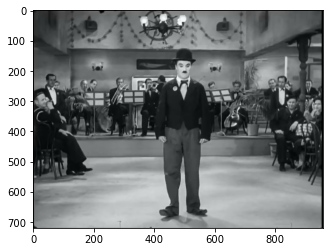

In [13]:
ret , frame = cap.read()
plt.imshow(frame)

### Set up the initial tracking window

In [14]:
face_casc = cv2.CascadeClassifier("haar-cascade-files-master/haarcascade_frontalface_default.xml")
face_rects = face_casc.detectMultiScale(frame)

### Convert the list to a tuple

In [15]:
face_x, face_y, w, h = tuple(face_rects[0])
track_window = (face_x, face_y, w, h)

### set up the ROI for tracking

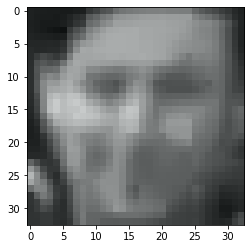

In [16]:
roi = frame[face_y:face_y+h,
           face_x:face_x+w]
plt.imshow(roi)

### HSV color maping

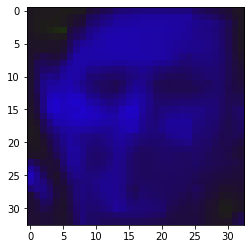

In [17]:
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_roi)

### Histogram to target on each frame for the meanshift calculation

In [18]:
roi_hist = cv2.calcHist([hsv_roi],
                       [0],
                       None,
                       [180],
                       [0,180])

### Normalize the histogram

In [19]:
cv2.normalize(roi_hist,
             roi_hist,
             0,
             255,
             cv2.NORM_MINMAX);

### Set the termination criteria
10 iterations or move 1 pt

In [20]:
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

### It's a Kind of Magic

In [21]:
# While loop
while(cap.isOpened()):
    
    # read capture
    ret, frame = cap.read()
    
    # if statement
    if ret == True:
            
        # Frame in HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # Calculate the base of ROI
        dest_roi = cv2.calcBackProject([hsv],
                                       [0],
                                       roi_hist,
                                       [0,180],
                                       1)
        
        # Camshift to get the new coordinates of rectangle
        ret, track_window = cv2.CamShift(dest_roi, track_window, term_crit)
        
        # Draw rectangle on image
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv2.polylines(frame,
                            [pts],
                            True,
                            (0,255,0),
                            5)
        
        # Open new window and display
        cv2.imshow('Cam Shift', img2)
        
        # Close window
        if cv2.waitKey(50) & 0xFF == 27 :
            break
        
    # else statement
    else:
        break
    
# Release and Destroy
cap.release()
cv2.destroyAllWindows()

